In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep  6 12:27:22 2021

@author: BMONISH
"""

import numpy as np
import pandas as pd
import pandas

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set_style('whitegrid')
#get_ipython().magic('matplotlib inline')

#from pandas_datareader import DataReader
from datetime import datetime

# For division
#from __future__ import division

import requests

In [4]:
def fetchStockData(symbol,interval,periodRange):
    
    '''Fetches the Stock Open, Close Price data through Yahoo Finance API (Stock Market Data)
    
    Parameter: symbol: Name of the Stock
               interval: Interval Time Period
               periodRange: Stock's last n times data 
    Return: JSON Response
    
    '''
  
    url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/market/get-charts"
    
    headers = {
        'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
        'x-rapidapi-key': "0cc8c583damsh53acdb6529bc71fp1f85b4jsne31ea993c595"
        }
    
    querystring = {"region":"US", "symbol": symbol, "interval":interval, "range":periodRange}
    
    
    response = requests.request("GET", url, headers=headers,params=querystring)
  
    if(response.status_code == 200):
        return response.json()
    else:
        return None

In [40]:
def parseTimestamp(inputdata):

    timestamplist = inputdata["chart"]["result"][0]["timestamp"]

    calendertime = []

    #Parse the Timestamp in to datetime for analysis
    for ts in timestamplist:
        dt = datetime.fromtimestamp(ts)
        calendertime.append(dt.strftime("%m/%d/%Y"))

    return calendertime

In [27]:
def parseValues(inputdata):

    valueDict = {}
    valueList['Open'] = inputdata["chart"]["result"][0]["indicators"]["quote"][0]["open"]
    valueList['Close'] = inputdata["chart"]["result"][0]["indicators"]["quote"][0]["close"]
    valueList['High'] = inputdata["chart"]["result"][0]["indicators"]["quote"][0]["high"]
    valueList['Low'] = inputdata["chart"]["result"][0]["indicators"]["quote"][0]["low"]
    valueList['Volume'] = inputdata["chart"]["result"][0]["indicators"]["quote"][0]["volume"]

    return valueList

'''def attachEvents(inputdata):

    eventlist = []

    for i in range(0,len(inputdata["chart"]["result"][0]["timestamp"])):
        eventlist.append("open")

    for i in range(0,len(inputdata["chart"]["result"][0]["timestamp"])):
        eventlist.append("close")

    return eventlist'''
    



'def attachEvents(inputdata):\n\n    eventlist = []\n\n    for i in range(0,len(inputdata["chart"]["result"][0]["timestamp"])):\n        eventlist.append("open")\n\n    for i in range(0,len(inputdata["chart"]["result"][0]["timestamp"])):\n        eventlist.append("close")\n\n    return eventlist'

In [98]:
df1 = df.append(pd.DataFrame(valueDict),ignore_index=True,sort=False)

In [103]:
df = pd.DataFrame()
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

for stock in tech_list:
    retdata = fetchStockData(stock,'1d','3mo')

    valueDict = retdata["chart"]["result"][0]["indicators"]["quote"][0]

    if (inputdata != None): 

        valueDict["Timestamp"] = parseTimestamp(retdata)
        valueDict["Symbol"] = stock

        df = df.append(pd.DataFrame(valueDict),ignore_index=True,sort=False)
        


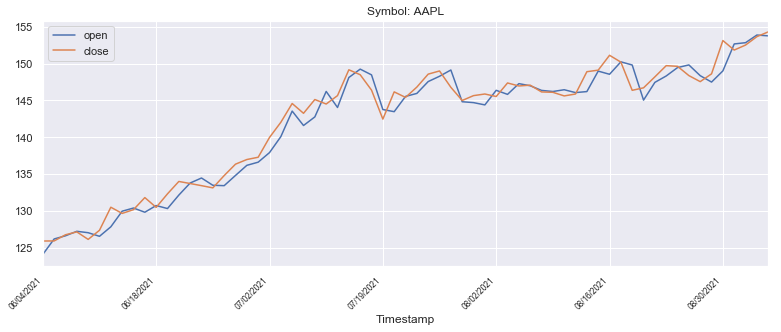

In [108]:
sns.set(style="darkgrid")

rcParams['figure.figsize'] = 13,5
rcParams['figure.subplot.bottom'] = 0.2

  
'''ax = sns.lineplot(x="Timestamp", y="close",dashes=False, markers=True, 
               data=df, sort=False)

ax = sns.lineplot(x="Timestamp", y="open",dashes=False, markers=True, 
               data=df, sort=False,)
'''
apple = df[df.Symbol == 'AAPL']
fig, ax = plt.subplots()

apple[['open','close']].plot(ax=ax)

ax.set_title('Symbol: AAPL')
  
plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='x-small'  
  )

plt.show()

#### Simple Moving Average 

In [109]:
# Let's go ahead and plot out several moving averages
MA_day = [10,20]

for ma in MA_day:
    column_name = '%sD MA' %(str(ma))
    apple[column_name] = apple['close'].rolling(ma).mean()

C:\Users\bmonish\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


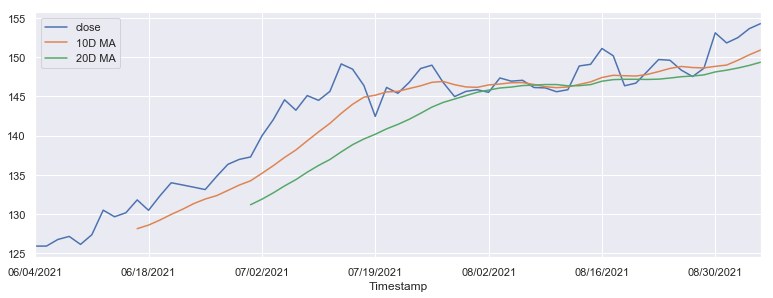

In [110]:
apple[['close','10D MA','20D MA']].plot()

Moving average gives glimpse of stock is moving against the period of last few days. There is strong upward movement can be seen as the price is clearly above both 10 day MA and 20 day MA except for few days.

#### Daily Percentage Change

In [125]:
#use pct_change to calculate the percent change on daily basis

apple['Daily Return'] = apple['close'].pct_change()

C:\Users\bmonish\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


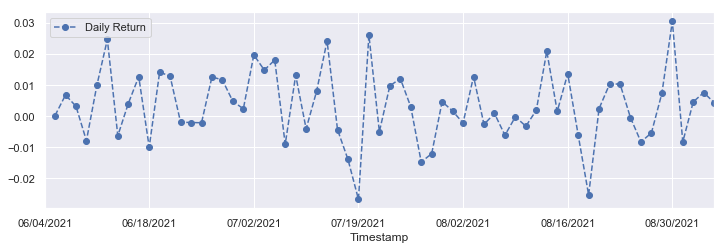

In [113]:
apple['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')A

In [124]:
print("Number of days price is in positive zone",len(apple[apple['Daily Return'] >= 0]))
print("Number of days price is in negative zone",len(apple[apple['Daily Return'] < 0]))


Number of days price is in positive zone 39
Number of days price is in negative zone 25


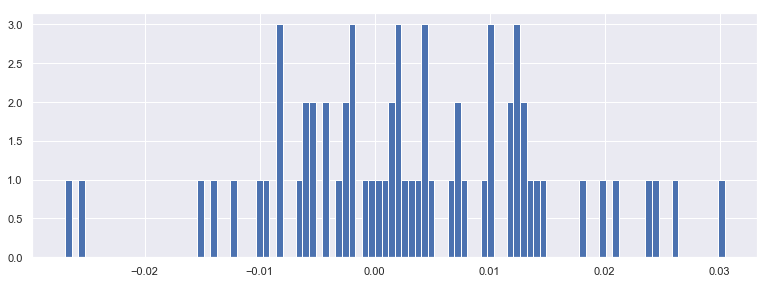

In [126]:
apple['Daily Return'].hist(bins=100)

There is not much difference in the daily change percentage. For the past 30 days the maximum change is not more than 3%. This shows the stock is less volatile. Though we cannot rule out volatility as price change is above 2% some days.

In [147]:
df['Daily Return'] = df.groupby('Symbol')['close'].pct_change()

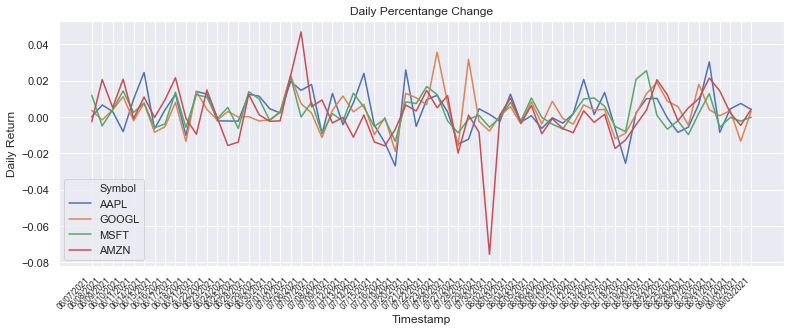

In [151]:
ax = sns.lineplot(x=df.index, y="Daily Return",hue='Symbol', dashes=False, markers=True, 
               data=df, sort=False)

ax.set_title('Daily Percentange Change')
  
plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='x-small'  
  )

plt.show()

In [162]:
comparison_df = pd.DataFrame()

comparison_df['Amazon'] = df[df['Symbol'] == "AMZN"]['Daily Return']
comparison_df['Apple'] = df[df['Symbol'] == "AAPL"]['Daily Return']

comparison_df

,Amazon,Apple
Timestamp,,
06/04/2021,NaN,NaN
06/07/2021,-0.002561,0.000079
06/08/2021,0.020669,0.006672
06/09/2021,0.005220,0.003077
06/10/2021,0.020877,-0.008023
06/11/2021,-0.000842,0.009833
06/14/2021,0.011067,0.024578
06/15/2021,-0.000219,-0.006438
06/16/2021,0.009494,0.003934


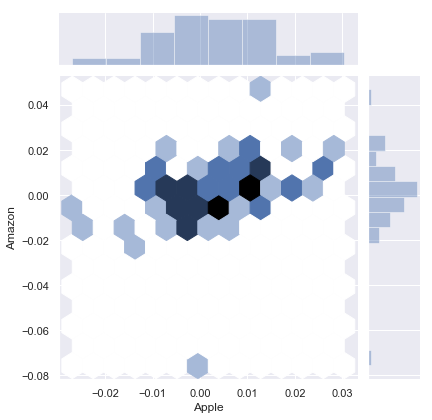

In [164]:
sns.jointplot(data=comparison_df, x='Apple', y="Amazon",kind='hex')